# City Weather with OpenWeatherAPI
## Generate City Data

In [23]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from scipy.stats import linregress
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | letterkenny
Processing Record 2 of Set 1 | virden
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | berlevag
Processing Record 6 of Set 1 | victoria
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | medina
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | camana
Processing Record 12 of Set 1 | tak
Processing Record 13 of Set 1 | te anau
Processing Record 14 of Set 1 | pavlodar
Processing Record 15 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | vila franca do campo
Processing Record 18 of Set 1 | dhidhdhoo
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | mayo
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 o

Processing Record 40 of Set 4 | thinadhoo
Processing Record 41 of Set 4 | sol-iletsk
Processing Record 42 of Set 4 | wicklow
Processing Record 43 of Set 4 | marsh harbour
Processing Record 44 of Set 4 | ilovka
Processing Record 45 of Set 4 | betafo
Processing Record 46 of Set 4 | hirara
Processing Record 47 of Set 4 | kharakvasla
Processing Record 48 of Set 4 | longyearbyen
Processing Record 49 of Set 4 | broome
Processing Record 50 of Set 4 | le port
Processing Record 1 of Set 5 | rorvik
Processing Record 2 of Set 5 | zyryanka
Processing Record 3 of Set 5 | yumen
Processing Record 4 of Set 5 | ambilobe
Processing Record 5 of Set 5 | khonuu
City not found. Skipping...
Processing Record 6 of Set 5 | nola
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | kamenka
Processing Record 9 of Set 5 | zlotoryja
Processing Record 10 of Set 5 | tazovskiy
Processing Record 11 of Set 5 | hambantota
Processing Record 12 of Set 5 | andenes
Processing Record 13 of Set 5 | russell
Proce

Processing Record 30 of Set 8 | trairi
Processing Record 31 of Set 8 | moose factory
Processing Record 32 of Set 8 | zonguldak
Processing Record 33 of Set 8 | vardo
Processing Record 34 of Set 8 | zabaykalsk
Processing Record 35 of Set 8 | awbari
Processing Record 36 of Set 8 | karasburg
Processing Record 37 of Set 8 | baijiantan
Processing Record 38 of Set 8 | skole
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | mpika
Processing Record 41 of Set 8 | quang ngai
Processing Record 42 of Set 8 | pamplona
Processing Record 43 of Set 8 | bonthe
Processing Record 44 of Set 8 | pasni
Processing Record 45 of Set 8 | yakima
Processing Record 46 of Set 8 | saldanha
Processing Record 47 of Set 8 | siare
City not found. Skipping...
Processing Record 48 of Set 8 | portland
Processing Record 49 of Set 8 | lumby
Processing Record 50 of Set 8 | tumbi
Processing Record 1 of Set 9 | monrovia
Processing Record 2 of Set 9 | beringovskiy
Processing Record 3 of Set 9 | rawalpindi
Proc

Processing Record 18 of Set 12 | oussouye
Processing Record 19 of Set 12 | arman
Processing Record 20 of Set 12 | hirado
Processing Record 21 of Set 12 | henties bay
Processing Record 22 of Set 12 | kristiansund
Processing Record 23 of Set 12 | sungaipenuh
Processing Record 24 of Set 12 | montlucon
Processing Record 25 of Set 12 | nalut
Processing Record 26 of Set 12 | ondangwa
Processing Record 27 of Set 12 | sao miguel
Processing Record 28 of Set 12 | lamesa
Processing Record 29 of Set 12 | chapais
Processing Record 30 of Set 12 | cootamundra
Processing Record 31 of Set 12 | manacapuru
Processing Record 32 of Set 12 | gazanjyk
Processing Record 33 of Set 12 | roberto payan
City not found. Skipping...
Processing Record 34 of Set 12 | verkhoyansk
Processing Record 35 of Set 12 | aswan
Processing Record 36 of Set 12 | bagn
Processing Record 37 of Set 12 | kitimat
Processing Record 38 of Set 12 | warqla
City not found. Skipping...
Processing Record 39 of Set 12 | dharapuram
Processing Re

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Letterkenny,54.9500,-7.7333,60.46,97,100,3.02,IE,2022-07-17 00:42:14
1,Virden,39.5009,-89.7679,84.25,95,99,10.94,US,2022-07-17 00:42:14
2,Rikitea,-23.1203,-134.9692,72.28,73,100,13.49,PF,2022-07-17 00:42:14
3,Kapaa,22.0752,-159.3190,85.98,76,100,18.41,US,2022-07-17 00:38:26
4,Berlevag,70.8578,29.0864,53.40,87,100,17.27,NO,2022-07-17 00:42:15
5,Victoria,22.2855,114.1577,89.19,78,100,11.99,HK,2022-07-17 00:42:15
6,New Norfolk,-42.7826,147.0587,53.10,82,49,3.00,AU,2022-07-17 00:42:15
7,Ushuaia,-54.8000,-68.3000,38.86,70,20,4.61,AR,2022-07-17 00:41:34
8,Medina,24.4686,39.6142,93.63,21,0,8.05,SA,2022-07-17 00:37:34
9,Chuy,-33.6971,-53.4616,47.37,93,100,15.50,UY,2022-07-17 00:42:16


In [14]:
# Reorder the columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Letterkenny,IE,2022-07-17 00:42:14,54.9500,-7.7333,60.46,97,100,3.02
1,Virden,US,2022-07-17 00:42:14,39.5009,-89.7679,84.25,95,99,10.94
2,Rikitea,PF,2022-07-17 00:42:14,-23.1203,-134.9692,72.28,73,100,13.49
3,Kapaa,US,2022-07-17 00:38:26,22.0752,-159.3190,85.98,76,100,18.41
4,Berlevag,NO,2022-07-17 00:42:15,70.8578,29.0864,53.40,87,100,17.27
5,Victoria,HK,2022-07-17 00:42:15,22.2855,114.1577,89.19,78,100,11.99
6,New Norfolk,AU,2022-07-17 00:42:15,-42.7826,147.0587,53.10,82,49,3.00
7,Ushuaia,AR,2022-07-17 00:41:34,-54.8000,-68.3000,38.86,70,20,4.61
8,Medina,SA,2022-07-17 00:37:34,24.4686,39.6142,93.63,21,0,8.05
9,Chuy,UY,2022-07-17 00:42:16,-33.6971,-53.4616,47.37,93,100,15.50


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Scatter Plots

In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

### Latitude vs Max Temp

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

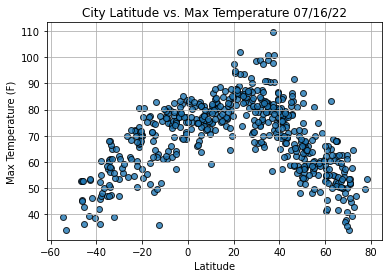

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

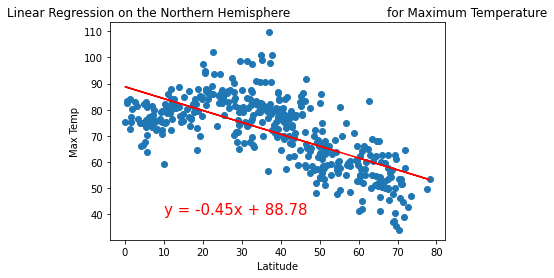

r-value: -0.6749060981807777


In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))
print(f"r-value: {linregress(x_values, y_values)[2]}")

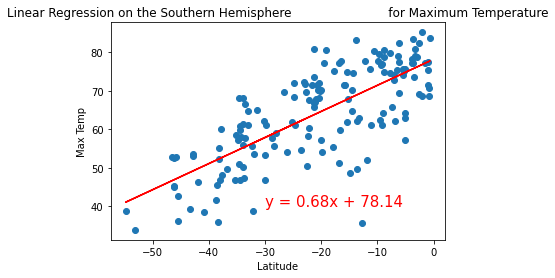

r-value: 0.747697836505588


In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-30,40))
print(f"r-value: {linregress(x_values, y_values)[2]}")

### Latitude vs Humidity

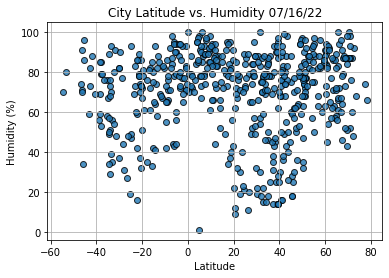

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

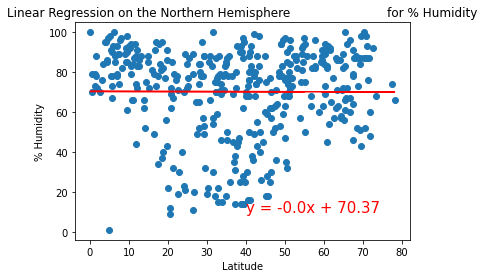

r-value: -0.002855234589338726


In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
print(f"r-value: {linregress(x_values, y_values)[2]}")

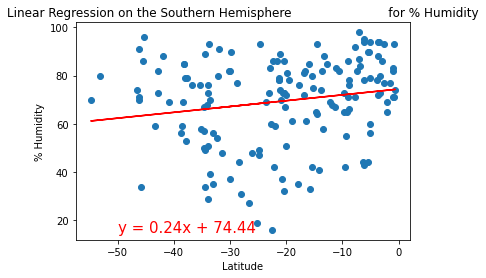

r-value: 0.18097585147154086


In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
print(f"r-value: {linregress(x_values, y_values)[2]}")

### Latitude vs Cloudiness

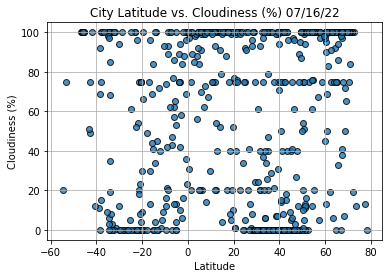

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

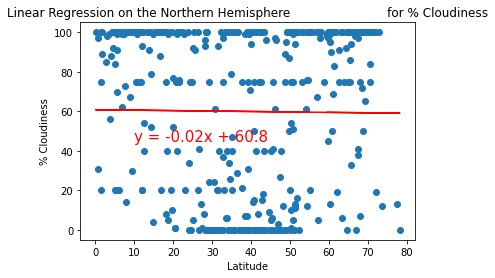

r-value: -0.01073245624725407


In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,45))
print(f"r-value: {linregress(x_values, y_values)[2]}")

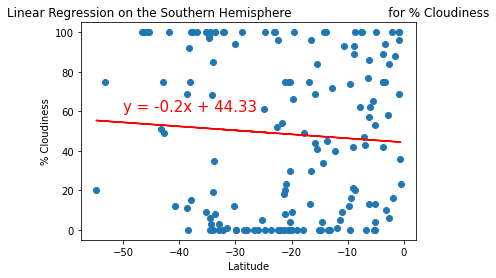

r-value: -0.06863328113940446


In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
print(f"r-value: {linregress(x_values, y_values)[2]}")

### Latitude vs Wind Speed

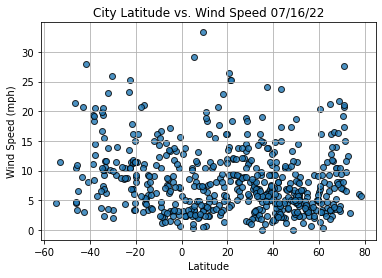

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

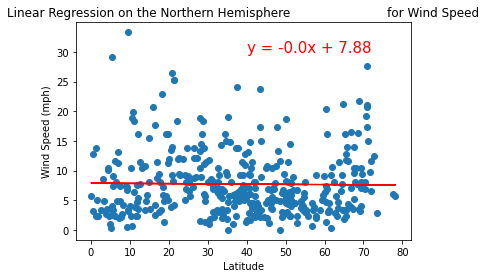

r-value: -0.01476717034642759


In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(40,30))
print(f"r-value: {linregress(x_values, y_values)[2]}")

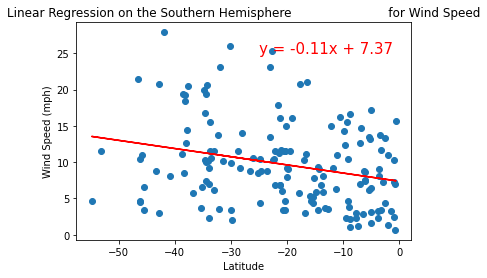

r-value: -0.2667278504100792


In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed (mph)',(-25,25))
print(f"r-value: {linregress(x_values, y_values)[2]}")